In [323]:
%matplotlib inline

In [324]:
import math
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [325]:
df = pd.read_csv("data/cookie_cats.csv")
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


our target here is retention: retention_1 and retention_7.
To see whether the difference between game version gate_30 and gate_40 will result in significant retention difference.
As retention is categorical, we use Chi-square for testing.
Null hypothesis: there is no relationship between game version and retention.

In [326]:
# check if userid is unique

if len(df["userid"].unique()) == len(df):
    print("userid is unique")
else:
    print("userid not unique") 

userid is unique


In [327]:
# statistical parameters of sum_gamerounds. Max number is too big, can be an anomaly.
df["sum_gamerounds"].describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
1%           0.000000
5%           1.000000
10%          1.000000
20%          3.000000
50%         16.000000
80%         67.000000
90%        134.000000
95%        221.000000
99%        493.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [328]:
# split into test A and test B, corresponding two different game versions
test_a = df[df["version"] == "gate_30"]
test_b = df[df["version"] == "gate_40"]

Text(0, 0.5, 'counts')

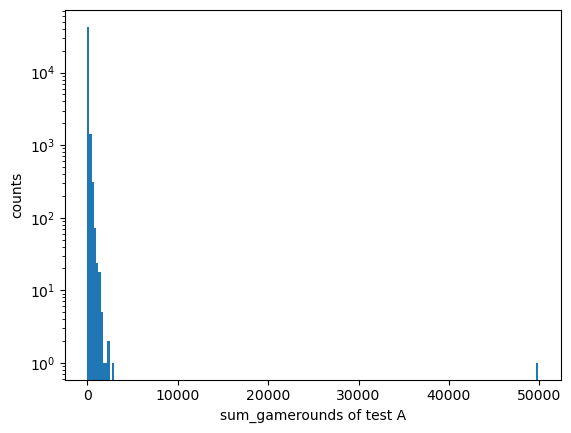

In [329]:
# visualize histogram of sum_gamerounds of test_a
# fig = px.histogram(test_a["sum_gamerounds"], log_y=True, title="sum_gamerounds of test A")
plt.hist(test_a["sum_gamerounds"], bins=200, log=True)
plt.xlabel("sum_gamerounds of test A")
plt.ylabel("counts")

Text(0, 0.5, 'counts')

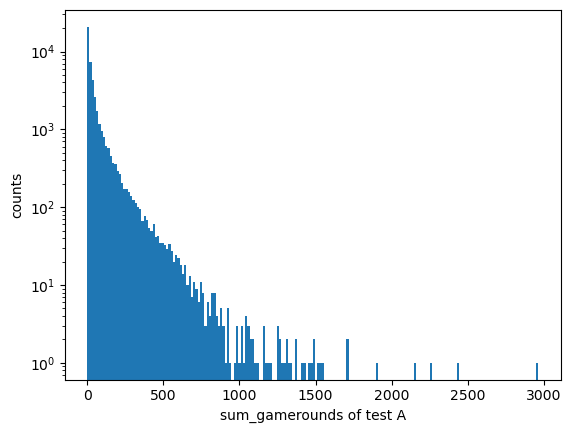

In [330]:
# remove the largest outlier
test_a = test_a[test_a["sum_gamerounds"] != test_a["sum_gamerounds"].max()]
plt.hist(test_a["sum_gamerounds"], bins=200, log=True)
plt.xlabel("sum_gamerounds of test A")
plt.ylabel("counts")

Text(0, 0.5, 'counts')

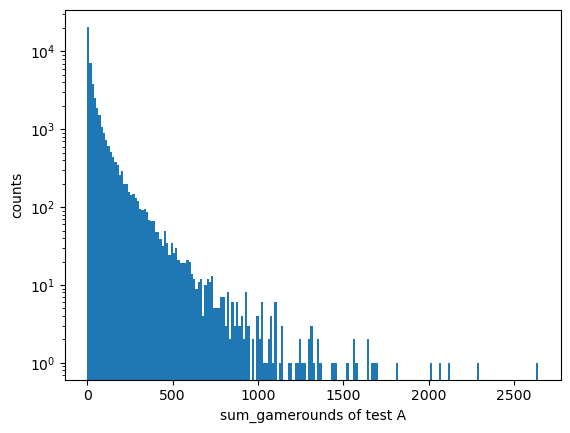

In [331]:
# visualize histogram of sum_gamerounds of test_b
plt.hist(test_b["sum_gamerounds"], bins=200, log=True)
plt.xlabel("sum_gamerounds of test B")
plt.ylabel("counts")

In [332]:
# define metrics, either retention_1 or retention_7, which are categorical variables. We try retention_1 first.
metrics = "retention_1"

In [333]:
_, (test_a_success_count, test_a_failed_count) = np.unique(test_a[metrics], return_counts=True)
_, (test_b_success_count, test_b_failed_count) = np.unique(test_b[metrics], return_counts=True)
contingency_table = pd.DataFrame([[test_a_success_count, test_b_success_count], [test_a_failed_count, test_b_failed_count]],
                                    columns=["A", "B"],
                                    index=["success","failed"])
contingency_table

,A,B
success,24665,25370
failed,20034,20119


In [334]:
# contingency table with expected values
contingency_table_np = contingency_table.to_numpy()
contingency_table_ev = np.sum(contingency_table_np, axis=0, keepdims=True)*np.sum(contingency_table_np, axis=1, keepdims=True)
contingency_table_ev = contingency_table_ev/contingency_table_np.sum()
pd.DataFrame(contingency_table_ev, columns=["A", "B"], index=["success","failed"])

,A,B
success,24798.359704,25236.640296
failed,19900.640296,20252.359704


In [335]:
# chi square and p value
chi2 = np.sum((contingency_table_np-contingency_table_ev)**2/contingency_table_ev)
freedom = (contingency_table_np.shape[0]-1)*(contingency_table_np.shape[1]-1)
chi2_p = 1.-stats.chi2.cdf(chi2, freedom)
chi2_p

0.07392076034183392

In [336]:
# where chi2_p > 0.05, so cannot reject null hypothesis, meaning no significant relationship
chi2_p < 0.05

False

In [337]:
# do one more time for retention_7
metrics = "retention_7"

In [338]:
_, (test_a_success_count, test_a_failed_count) = np.unique(test_a[metrics], return_counts=True)
_, (test_b_success_count, test_b_failed_count) = np.unique(test_b[metrics], return_counts=True)
contingency_table = pd.DataFrame([[test_a_success_count, test_b_success_count], [test_a_failed_count, test_b_failed_count]],
                                    columns=["A", "B"],
                                    index=["success","failed"])
contingency_table

,A,B
success,36198,37210
failed,8501,8279


In [339]:
# contingency table with expected values
contingency_table_np = contingency_table.to_numpy()
contingency_table_ev = np.sum(contingency_table_np, axis=0, keepdims=True)*np.sum(contingency_table_np, axis=1, keepdims=True)
contingency_table_ev = contingency_table_ev/contingency_table_np.sum()
pd.DataFrame(contingency_table_ev, columns=["A", "B"], index=["success","failed"])

,A,B
success,36382.492039,37025.507961
failed,8316.507961,8463.492039


In [340]:
# chi square and p value
chi2 = np.sum((contingency_table_np-contingency_table_ev)**2/contingency_table_ev)
freedom = (contingency_table_np.shape[0]-1)*(contingency_table_np.shape[1]-1)
chi2_p = 1.-stats.chi2.cdf(chi2, freedom)
chi2_p

0.001591773177399336

In [341]:
# where chi2_p < 0.05, so reject null hypothesis, meaning significant relationship
chi2_p < 0.05

True